<a href="https://colab.research.google.com/github/dtht2d/deep-learning/blob/main/codes/model_metrics/binary_classification_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%autosave 30

Autosaving every 30 seconds


## **1. Study case example for model metrics**
---

A deep learning model that is trained to tell apart “dogs” from “not dogs”. Our test dataset has images of 40 cats and 60 dogs. 5 of the cats were classified as dogs, and 6 of the dogs were classified as cats. Calculate the sensitivity (GAR), specificity (GRR), type I error (FAR), type II error (FRR), precision, and recall. 

**Solution**:

Total samples:
- Cats = 40
- Dogs = 60 

Classification: 
-  Cats were classified as dogs = 5
- Dogs were classified as cats = 6

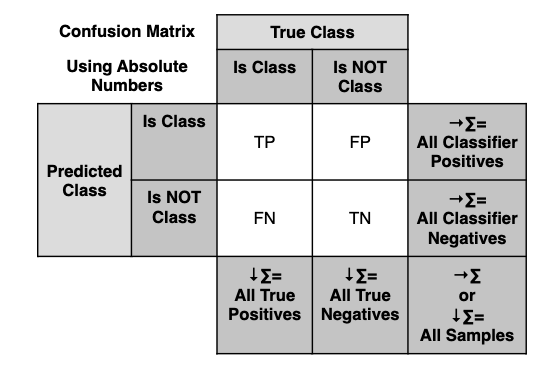

In references to dogs classification:
- True positive (TP): The model corectly classified images dogs as dogs (cats) → **TP = 60-6 =54**
- False Positive (FP): The model classifies images as dogs but they were cats → **FP= 5**
- True Negative (TN): The model classifies images as not dogs (correctly classified cats) → **TN = 40-5 (cats misclassified as dogs) - 1 (dog misclassifies as a cat)=34**
- False Negative (FN): The model classifies as not dogs (cats) but they were dogs → **FN = 6**





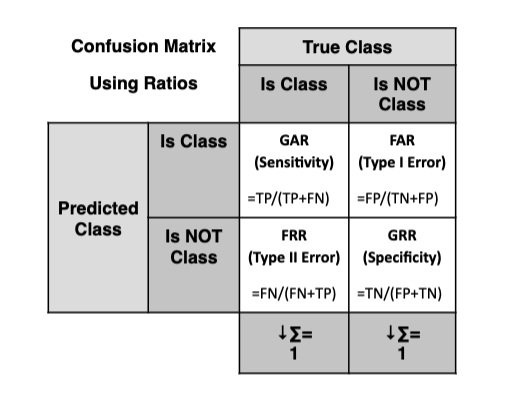

### **Results**
---
- Sensitivity $GAR = \frac{TP}{TP+FN} = \frac{54}{54+6}= 0.9 $
- Specificity $GRR = \frac{TN}{TN+FP} = \frac{34}{34+5}= 0.871 $
- Type I error $FAR = \frac{FP}{TN+FP} = \frac{5}{5+35}= 0.125$
- Type II error $FRR = \frac{FN}{FN+TP} = \frac{6}{6+54}= 0.125$
- $Precision = \frac{TP}{(TP+FP)}= \frac{54}{54+5}= 0.915$ 
- $Recall = \frac{TP}{(TP+FN)}=\frac{54}{54+6}=0.9$ 


## **2.  Losgistic regression for binary classification**

**Goal**: Perform logistic regression on the breast cancer dataset and visualize the ROC curve. 

---
### **How do we evaluate performance of binary classifiers?**
**Receiver Operating Characteristic - ROC Definition**:
- Represent the performance of a binary classifier as its discrimination threshold is varied
- Created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
  - TPR is known as sensitivity, recall or hit rate, and measures the proportion of actual positive cases that are correctly identified as positive by the classifier.
  - FPR is known as fall-out or false alarm rate, and measures the proportion of actual negative cases that are incorrectly identified as positive by the classifier.

  The ROC curve provides a way to visualize the trade-off between TPR and FPR for different threshold values. The ideal classifier would have a TPR of 1 (i.e., correctly identifying all positive cases) and an FPR of 0 (i.e., not identifying any negative cases as positive), resulting in a point in the upper left corner of the ROC space. A random classifier, on the other hand, would produce a diagonal line from the bottom left corner to the top right corner, with an AUC (area under the curve) of 0.5. A good classifier should have an AUC value closer to 1, indicating that it has high TPR and low FPR across a range of threshold values. The ROC curve is used to evaluate the performance of binary classifiers.

### Import library

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

### Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/deep-learning/data/breast-cancer.csv"

Creates a pandas DataFrame to visualize the parameters we are working with:



In [ ]:
df = pd.read_csv(path)
print (df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [ ]:
# map the 'M' and 'B' values in the diagnosis column to 1's and 0's, and convert to numpy array
# M - Malignant, B - Benign
y = df['diagnosis'].map({'M': 1, 'B': 0}).to_numpy()

# Select all the columns except the diagnosis column as input variable X
X = df.iloc[:, 2:].to_numpy()

print (X)
print (X.shape)
print (y)
print (y.shape)


[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


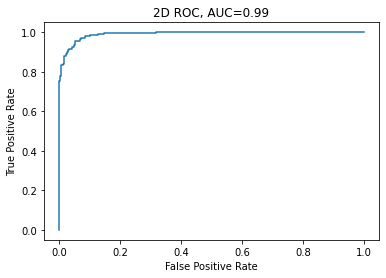

In [ ]:
# Create a logistic regression model and fit it to the data
clf = LogisticRegression()
clf.fit(X, y)

# Use the model to predict probabilities for each data point
y_pred = clf.predict_proba(X)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), 
# and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred)

# Calculate the area under the ROC curve (AUC)
auc_score = auc(fpr, tpr)

# Visualize the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'2D ROC, AUC={auc_score:.2f}')
plt.show()
